In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0982	Val Loss:	1.0966	Accuracy:	0.3782	F1:	0.1829
2 / 30: Train Loss:	1.0697	Val Loss:	1.0161	Accuracy:	0.3782	F1:	0.1829
3 / 30: Train Loss:	0.9883	Val Loss:	0.9564	Accuracy:	0.5210	F1:	0.4130
4 / 30: Train Loss:	0.8900	Val Loss:	0.8785	Accuracy:	0.6303	F1:	0.5789
5 / 30: Train Loss:	0.7047	Val Loss:	0.6541	Accuracy:	0.7311	F1:	0.7284
6 / 30: Train Loss:	0.4863	Val Loss:	0.5677	Accuracy:	0.7647	F1:	0.7643
7 / 30: Train Loss:	0.3268	Val Loss:	0.5752	Accuracy:	0.7983	F1:	0.7974
8 / 30: Train Loss:	0.2233	Val Loss:	0.5817	Accuracy:	0.7983	F1:	0.7943
9 / 30: Train Loss:	0.1489	Val Loss:	0.5662	Accuracy:	0.8151	F1:	0.8146
10 / 30: Train Loss:	0.1075	Val Loss:	0.6201	Accuracy:	0.7983	F1:	0.7984
11 / 30: Train Loss:	0.0764	Val Loss:	0.6848	Accuracy:	0.7899	F1:	0.7896
12 / 30: Train Loss:	0.0680	Val Loss:	0.7366	Accuracy:	0.7899	F1:	0.7890
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0525	Val Loss:	0.9064	Accuracy:	0.5630	F1:	0.4464
2 / 30: Train Loss:	0.7836	Val Loss:	0.7200	Accuracy:	0.7143	F1:	0.7195
3 / 30: Train Loss:	0.5335	Val Loss:	0.5784	Accuracy:	0.7899	F1:	0.7918
4 / 30: Train Loss:	0.3299	Val Loss:	0.5469	Accuracy:	0.7815	F1:	0.7818
5 / 30: Train Loss:	0.2217	Val Loss:	0.6845	Accuracy:	0.7563	F1:	0.7562
6 / 30: Train Loss:	0.1265	Val Loss:	0.7262	Accuracy:	0.7899	F1:	0.7947
7 / 30: Train Loss:	0.2385	Val Loss:	0.6690	Accuracy:	0.7815	F1:	0.7853
8 / 30: Train Loss:	0.2272	Val Loss:	1.0660	Accuracy:	0.7227	F1:	0.7117
9 / 30: Train Loss:	0.1947	Val Loss:	0.7324	Accuracy:	0.7983	F1:	0.8003
10 / 30: Train Loss:	0.0542	Val Loss:	0.8711	Accuracy:	0.7815	F1:	0.7770
11 / 30: Train Loss:	0.0285	Val Loss:	0.8335	Accuracy:	0.7899	F1:	0.7893
12 / 30: Train Loss:	0.0385	Val Loss:	0.9877	Accuracy:	0.7815	F1:	0.7790
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0642	Val Loss:	0.8384	Accuracy:	0.6387	F1:	0.6215
2 / 30: Train Loss:	0.8952	Val Loss:	0.8458	Accuracy:	0.5546	F1:	0.4526
3 / 30: Train Loss:	0.7938	Val Loss:	0.8403	Accuracy:	0.5630	F1:	0.4641
4 / 30: Train Loss:	0.7306	Val Loss:	0.8427	Accuracy:	0.5714	F1:	0.4647
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.67      0.32      0.43        38
oversimplification       1.00      0.61      0.76        36
slothful induction       0.53      0.93      0.68        45

          accuracy                           0.64       119
         macro avg       0.73      0.62      0.62       119
      weighted avg       0.72      0.64      0.62       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.54      0.32      0.40        22
oversimplification       0.73      0.55      0.63        20
slothf

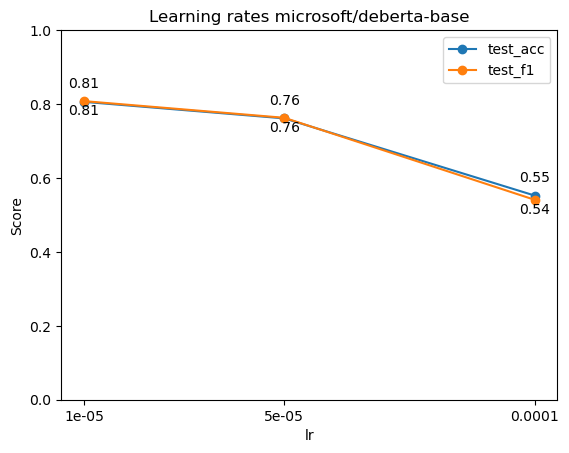

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f